This is my first blush of using peak detection to attempt to detect potentially hazardous sections of the video.

imports

In [44]:
import warnings
from importlib import reload

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.signal import find_peaks

from video import vid as v
from video import videolike as vl
from video import channel as c
from video.conversion import Conversions

In [45]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

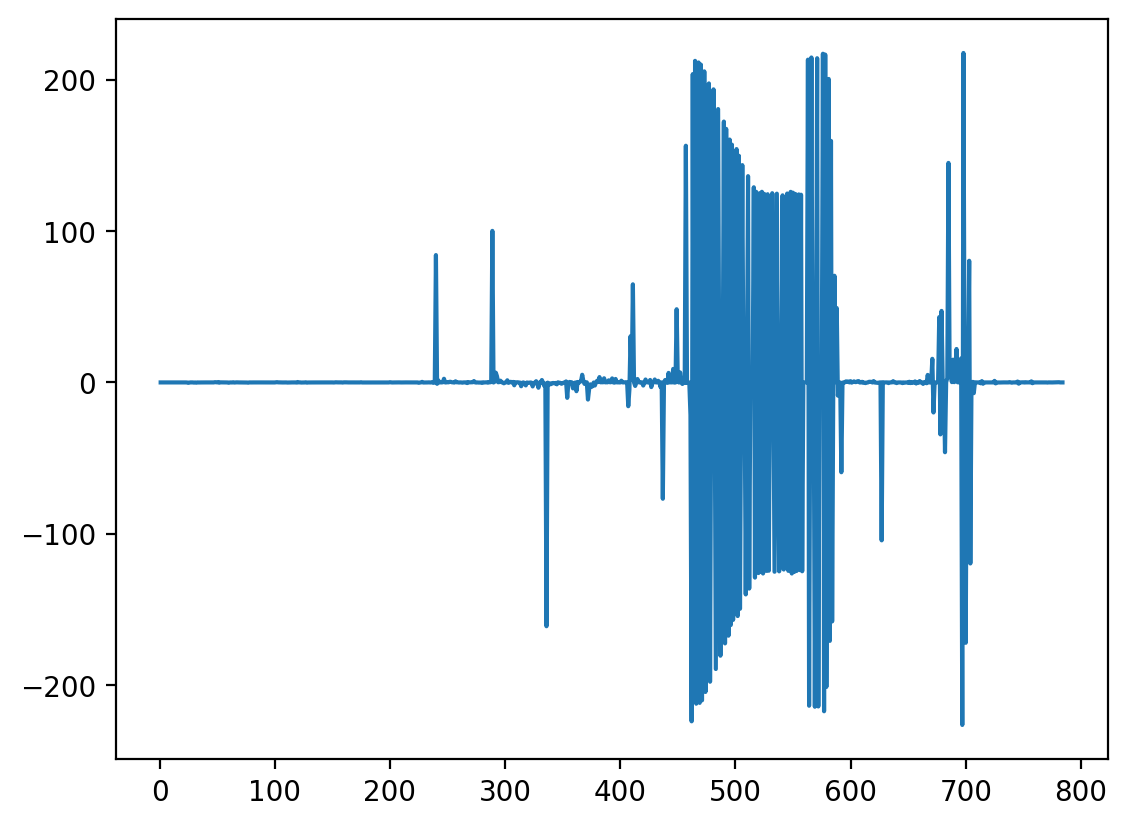

In [46]:
reload(vl)
reload(c)
reload(v)
avid = v.Video.from_file('videos/Banned Pokemon Seizure Scene.mp4',Conversions.RGB)
grayvid = avid.mask('red').gray.difference(1,'mean')
plt.plot(grayvid) 

## The first step in peak detection is to..erm...detect the peaks

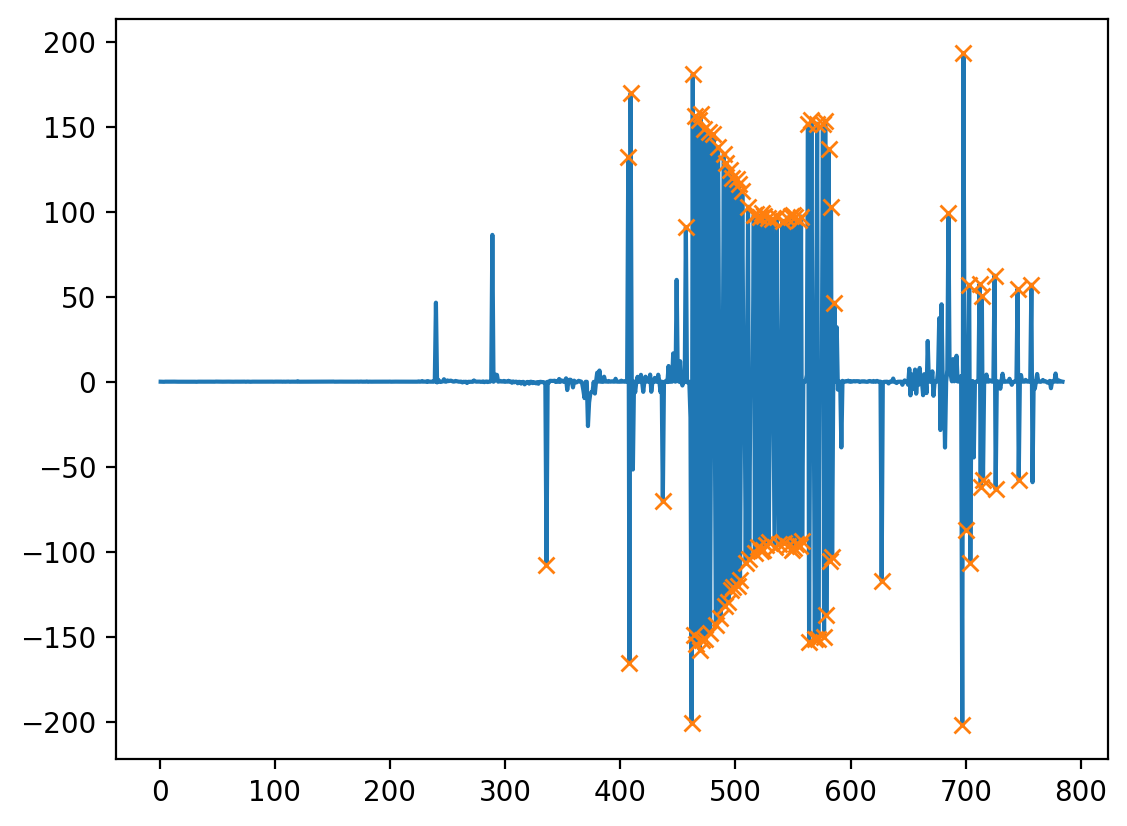

In [47]:
reload(vl)
reload(v)
reload(c)
mask_channel = 'red'
aggvid = avid.gray.difference(1,'mean')
peaks,_ = find_peaks(aggvid,prominence=100)
valleys,_ = find_peaks(-aggvid,prominence=100)
peaks = np.sort(np.concatenate((peaks,valleys)))
plt.plot(aggvid)
plt.plot(peaks,aggvid[peaks],'x')

## Now we form a linkage matrix and use the elbow method to determine the optimal number of clusters

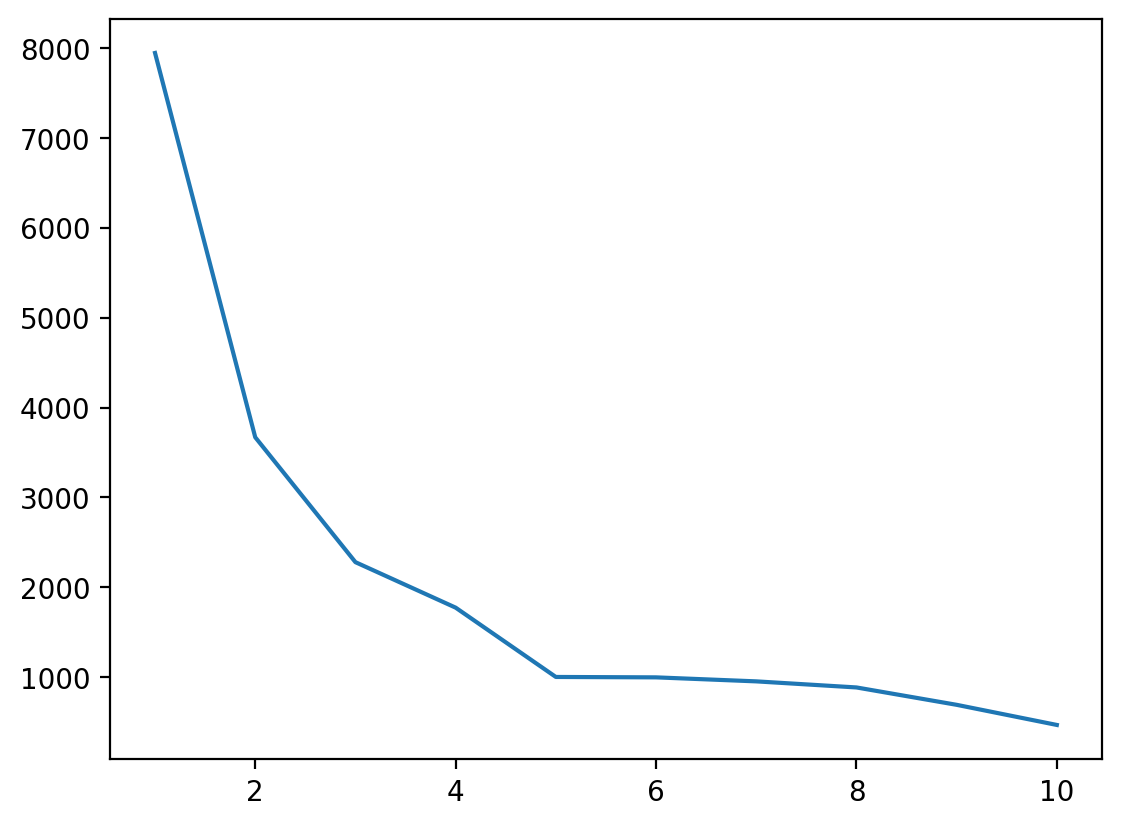

In [48]:
distance_matrix = np.abs(peaks[:, np.newaxis] - peaks)
link = linkage(distance_matrix,method='ward')
last = link[-10:,2]
last_rev = last[::-1]
idx =np.arange(1,len(last)+1)
plt.plot(idx,last_rev)


In [49]:
k = 4

clusters = fcluster(link,k,criterion='maxclust')
clusters

array([4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

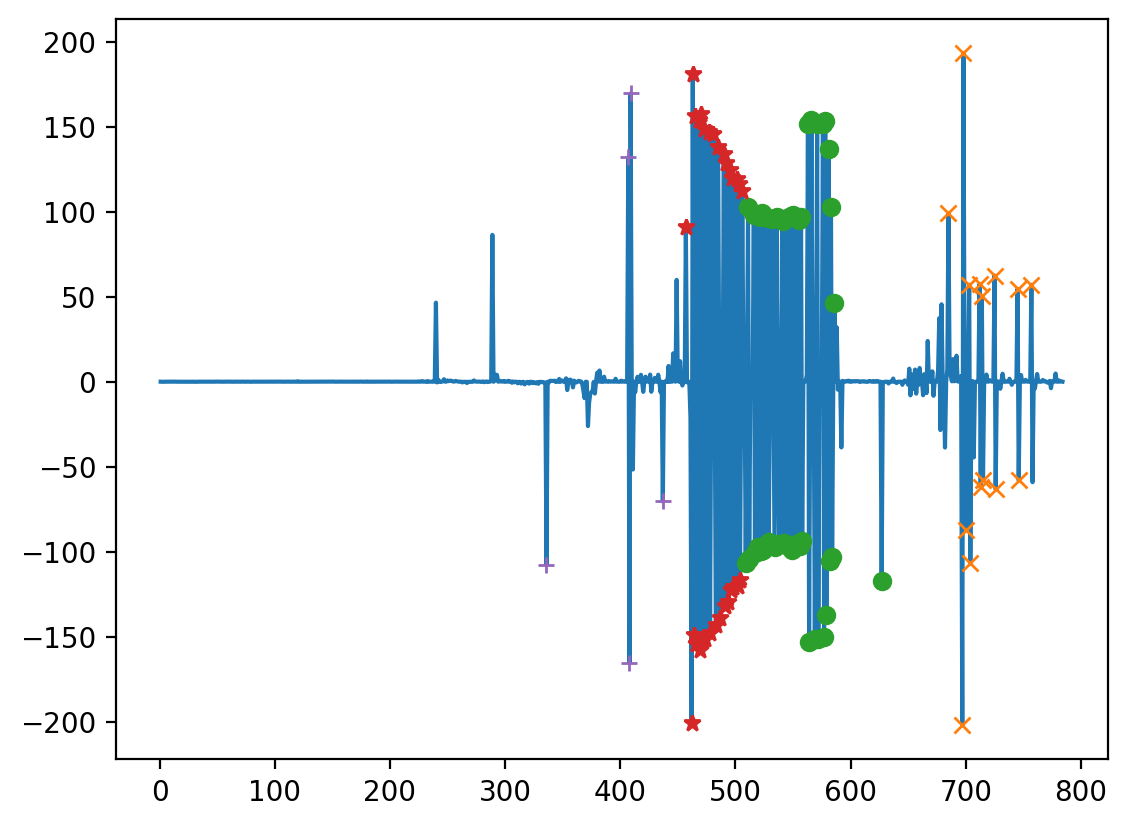

In [50]:
plt.plot(aggvid)
markers = ['x','o','*','+']
for cluster in range(1,k+1):
    cluster_indices = peaks[clusters==cluster]
    plt.plot(cluster_indices, aggvid[cluster_indices],markers[cluster-1])

## Now we get the cluster density

In [51]:
for cluster in range(1,k+1):
    cluster_indices = peaks[clusters==cluster]
    cluster_min = np.min(aggvid[cluster_indices])
    cluster_max = np.max(aggvid[cluster_indices])
    peak_density = cluster_indices.shape[0]/(cluster_max-cluster_min)
    print(peak_density)

0.03795106741172202
0.15957351535569428
0.08124658469497804
0.014929116554598765


## Now let's make a function out of it!!
**See `cluster_density.py` for functions. I will be testing them here.

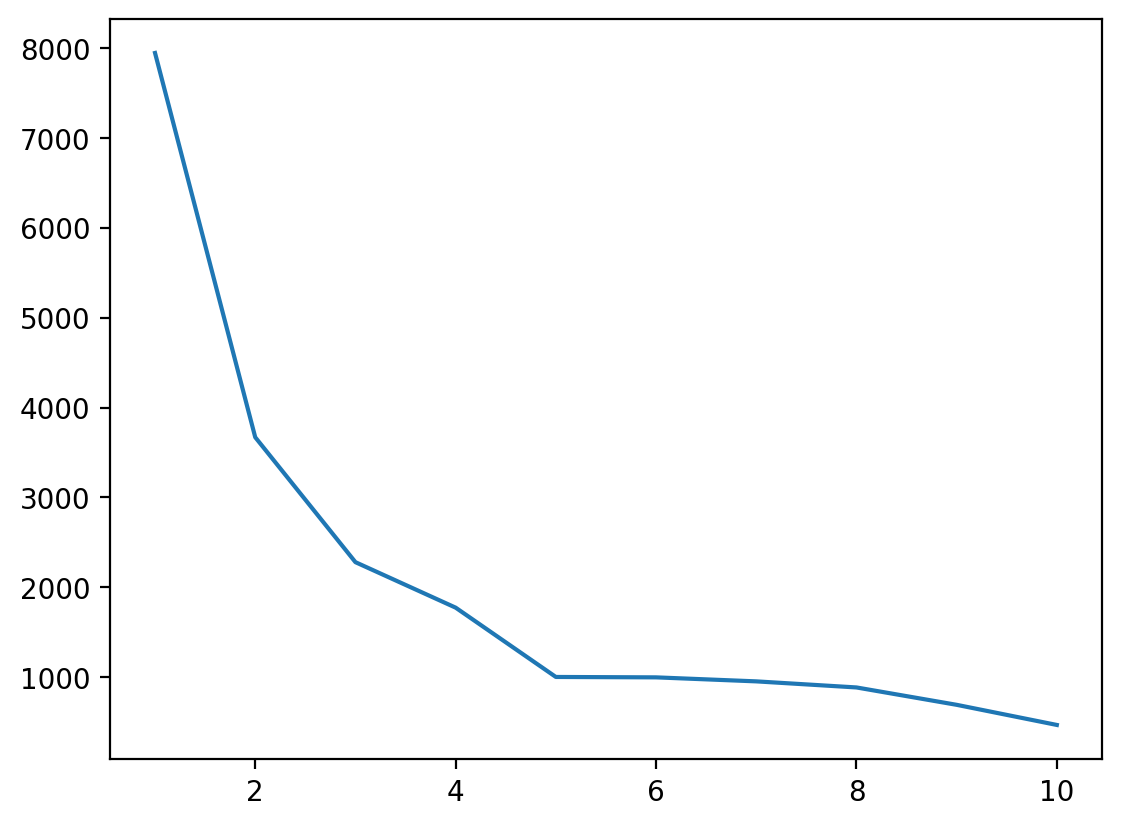

In [53]:
reload(cd)
link, fig = cd.generate_elbow(peaks)
plt.show()

In [54]:
k = 4
clusters = fcluster(link,k,criterion='maxclust')
for cluster in range(1,k+1):
    cluster_indices = peaks[clusters==cluster]
    cluster_min = np.min(aggvid[cluster_indices])
    cluster_max = np.max(aggvid[cluster_indices])
    peak_density = cluster_indices.shape[0]/(cluster_max-cluster_min)
    print(peak_density)

0.03795106741172202
0.15957351535569428
0.08124658469497804
0.014929116554598765


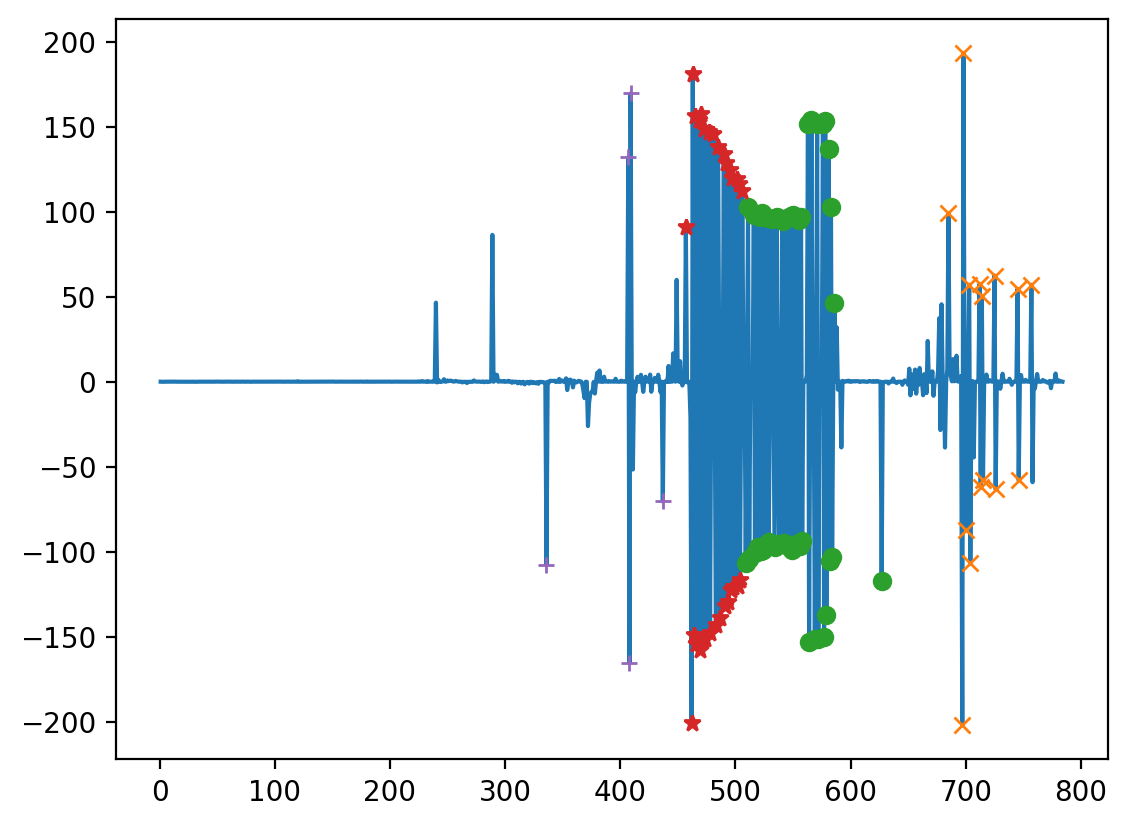

In [55]:
plt.plot(aggvid)
markers = ['x','o','*','+']
for cluster in range(1,k+1):
    cluster_indices = peaks[clusters==cluster]
    plt.plot(cluster_indices, aggvid[cluster_indices],markers[cluster-1])

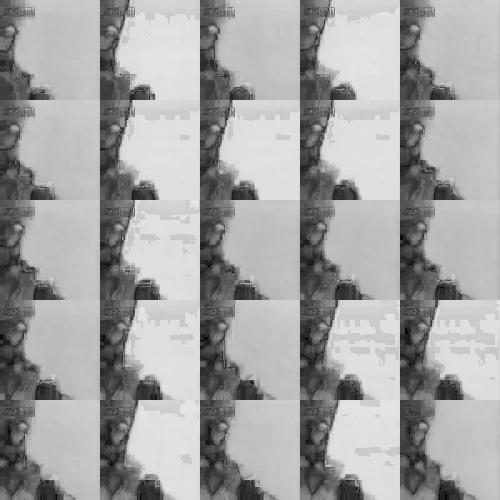

In [57]:

newvid.grayscale()[500:550].show()

## Now let's try clustering (IDK maybe it'll work?)

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
grayvid = avid.grayscale()
grayvid.show_gif()

NameError: name 'avid' is not defined